<a href="https://colab.research.google.com/github/elifozturk4/MealMuse/blob/main/MealMuse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import webbrowser

In [4]:
IMAGE_SIZE = 150
BATCH_SIZE = 32
EPOCHS = 10
CHANNELS = 3

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Vegetable Images',
    shuffle=False,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

dataset = dataset.cache()

Found 14020 files belonging to 3 classes.


In [6]:
train_path ="/content/drive/MyDrive/Vegetable Images/train"
test_path ="/content/drive/MyDrive/Vegetable Images/test"
val_path ="/content/drive/MyDrive/Vegetable Images/validation"

In [7]:
train_ds = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_ds.flow_from_directory(
                                            train_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')

val_ds = ImageDataGenerator(rescale = 1.0/255.0)
val_image_generator = train_ds.flow_from_directory(
                                            val_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')


test_ds = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = train_ds.flow_from_directory(
                                            test_path,
                                            target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')

Found 10010 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2010 images belonging to 10 classes.


In [26]:
class_names = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_names)

{0: 'Bezelye', 1: 'Brokoli', 2: 'Dolmalık biber', 3: 'Domates', 4: 'Havuç', 5: 'Kabak', 6: 'Karnabahar', 7: 'Lahana', 8: 'Patates', 9: 'Su Kabağı'}


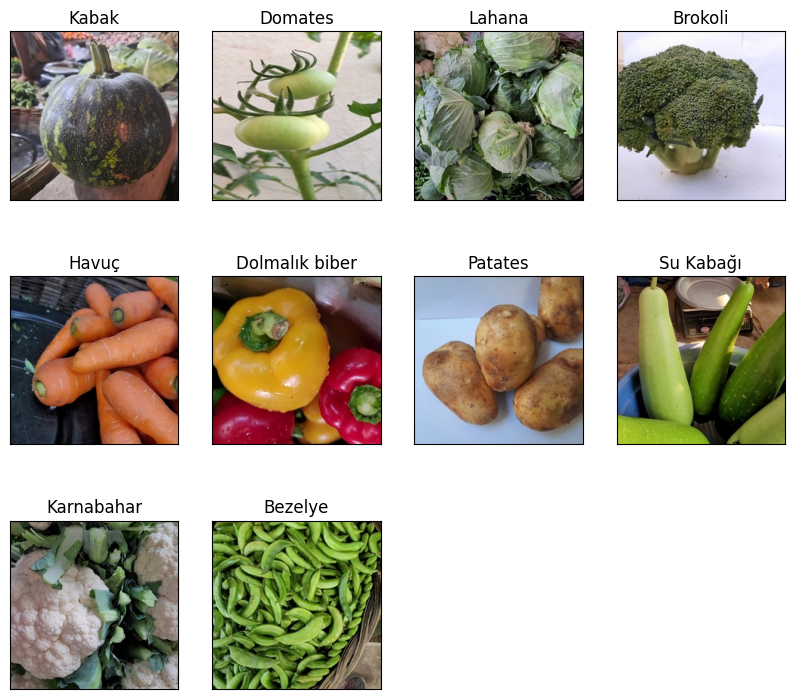

In [99]:
import random

plt.figure(figsize=(10,9))
for i, folder in enumerate(os.listdir(train_path)):
    file_paths = [os.path.join(train_path, folder, file)
      for file in os.listdir(os.path.join(train_path, folder))
      if file.endswith(('.jpg', '.png', '.jpeg'))]

    if file_paths:
        img_path = random.choice(file_paths)
        img = tf.keras.utils.load_img(img_path)

    if file_paths:
        img_path = random.choice(file_paths)
        img = tf.keras.utils.load_img(img_path)

        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(folder)

plt.show()

In [10]:
n_classes=10
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,728,458 (10.41 MB)

 Trainable params: 2,728,458 (10.41 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
hist = model.fit(
    train_image_generator,
    epochs=EPOCHS,
    verbose=1,
    validation_data=val_image_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2242s 7s/step - accuracy: 0.3386 - loss: 1.7727 - val_accuracy: 0.7065 - val_loss: 0.9377
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 553s 2s/step - accuracy: 0.7248 - loss: 0.8246 - val_accuracy: 0.8925 - val_loss: 0.3801
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 558s 2s/step - accuracy: 0.8291 - loss: 0.5151 - val_accuracy: 0.9325 - val_loss: 0.2554
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.8732 - loss: 0.4026 - val_accuracy: 0.9445 - val_loss: 0.1918
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.9095 - loss: 0.2881 - val_accuracy: 0.9365 - val_loss: 0.1901
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 550s 2s/step - accuracy: 0.9092 - loss: 0.2783 - val_accuracy: 0.9575 - val_loss: 0.1507
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 558s 2s/step - accuracy: 0.9272 - loss: 0.2136 - val_accuracy: 0.9660 - val_loss: 0.1270
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - accuracy: 0.9314 - loss: 0.2129 - val_accuracy: 0.97

In [14]:
model.evaluate(test_image_generator)

63/63 ━━━━━━━━━━━━━━━━━━━━ 396s 6s/step - accuracy: 0.9627 - loss: 0.1487


[0.18381652235984802, 0.955721378326416]

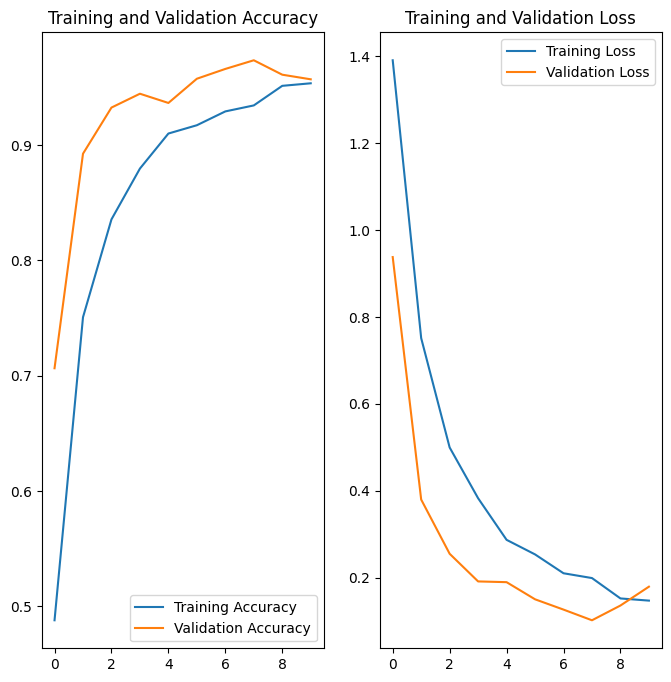

In [15]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

loss=hist.history['loss']
val_loss=hist.history['val_loss']


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [83]:
def create_link(predicted_class):
  """Tahmine göre bağlantı oluşturur."""
  links = {

      "Patates": "https://www.nefisyemektarifleri.com/ara/?s=patates",
      "Domates": "https://www.nefisyemektarifleri.com/ara/?s=domates",
      "Havuç": "https://www.nefisyemektarifleri.com/ara/?s=havu%C3%A7",
      "Dolmalık biber": "https://www.nefisyemektarifleri.com/ara/?s=dolmal%C4%B1k%20biber",
      "Brokoli": "https://www.nefisyemektarifleri.com/ara/?s=brokoli",
      "Kabak": "https://www.nefisyemektarifleri.com/ara/?s=kabak",
      "Su Kabağı":"https://www.nefisyemektarifleri.com/ara/?s=su+kaba%C4%9F%C4%B1",
      "Lahana":"https://www.nefisyemektarifleri.com/ara/?s=lahana",
      "Karnabahar":"https://www.nefisyemektarifleri.com/ara/?s=karnabahar",
      "Bezelye":"https://www.nefisyemektarifleri.com/ara/?s=bezelyee"
  }
  return links.get(predicted_class,None)

In [17]:
from tensorflow.keras.preprocessing import image

def sonuc_image(img_path):

  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array / 255.0


  prediction = model.predict(img_array)


  predicted_class_index = np.argmax(prediction)

  if 0 <= predicted_class_index < len(class_names):
    predicted_class = list(class_names.values())[predicted_class_index]
  else:
    predicted_class = "Unknown"
    print(f"Tahmin edilen sınıf indeksi {predicted_class_index} bilinen sınıfların aralığı dışında.")

  confidence = round(100 * (np.max(prediction)), 2)
  print('Tahmin edilen sınıf:', predicted_class)
  print('Güvenirlik:', confidence)

  create_link(predicted_class)

  link = create_link(predicted_class)

  if link:
    print(f"URL: {link}")
  else:
    print(f"{predicted_class} için URL bulunamadı.")

In [27]:
sonuc_image("/content/bezelye.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Tahmin edilen sınıf: Bezelye
Güvenirlik: 99.17
URL: https://www.nefisyemektarifleri.com/ara/?s=bezelyee


In [28]:
sonuc_image("/content/bezelye1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Tahmin edilen sınıf: Bezelye
Güvenirlik: 90.65
URL: https://www.nefisyemektarifleri.com/ara/?s=bezelyee


In [92]:
sonuc_image("/content/brokoli.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Tahmin edilen sınıf: Brokoli
Güvenirlik: 54.69
URL: https://www.nefisyemektarifleri.com/ara/?s=brokoli


In [58]:
sonuc_image("/content/brokoli2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Tahmin edilen sınıf: Brokoli
Güvenirlik: 89.02
URL: https://www.nefisyemektarifleri.com/ara/?s=brokoli


In [62]:
sonuc_image("/content/dolmalık_biber.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Tahmin edilen sınıf: Dolmalık biber
Güvenirlik: 100.0
URL: https://www.nefisyemektarifleri.com/ara/?s=dolmal%C4%B1k%20biber


In [63]:
sonuc_image("/content/dolmalık_biber1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tahmin edilen sınıf: Dolmalık biber
Güvenirlik: 99.99
URL: https://www.nefisyemektarifleri.com/ara/?s=dolmal%C4%B1k%20biber


In [33]:
sonuc_image("/content/domates.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Tahmin edilen sınıf: Domates
Güvenirlik: 99.85
URL: https://www.nefisyemektarifleri.com/ara/?s=domates


In [34]:
sonuc_image("/content/domates1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Tahmin edilen sınıf: Domates
Güvenirlik: 99.94
URL: https://www.nefisyemektarifleri.com/ara/?s=domates


In [84]:
sonuc_image("/content/havuc.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Tahmin edilen sınıf: Havuç
Güvenirlik: 56.17
URL: https://www.nefisyemektarifleri.com/ara/?s=havu%C3%A7


In [85]:
sonuc_image("/content/havuc1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Tahmin edilen sınıf: Havuç
Güvenirlik: 100.0
URL: https://www.nefisyemektarifleri.com/ara/?s=havu%C3%A7


In [89]:
sonuc_image("/content/kabak.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Tahmin edilen sınıf: Kabak
Güvenirlik: 98.64
URL: https://www.nefisyemektarifleri.com/ara/?s=kabak


In [40]:
sonuc_image("/content/karnabahar.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Tahmin edilen sınıf: Karnabahar
Güvenirlik: 100.0
URL: https://www.nefisyemektarifleri.com/ara/?s=karnabahar


In [41]:
sonuc_image("/content/karnabahar1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tahmin edilen sınıf: Karnabahar
Güvenirlik: 91.35
URL: https://www.nefisyemektarifleri.com/ara/?s=karnabahar


In [43]:
sonuc_image("/content/lahana1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Tahmin edilen sınıf: Lahana
Güvenirlik: 99.23
URL: https://www.nefisyemektarifleri.com/ara/?s=lahana


In [81]:
sonuc_image("/content/lahana2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Tahmin edilen sınıf: Lahana
Güvenirlik: 97.61
URL: https://www.nefisyemektarifleri.com/ara/?s=lahana


In [44]:
sonuc_image("/content/patates.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Tahmin edilen sınıf: Patates
Güvenirlik: 99.96
URL: https://www.nefisyemektarifleri.com/ara/?s=patates


In [45]:
sonuc_image("/content/patates1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Tahmin edilen sınıf: Patates
Güvenirlik: 99.93
URL: https://www.nefisyemektarifleri.com/ara/?s=patates


In [78]:
sonuc_image("/content/su_kabagı.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Tahmin edilen sınıf: Su Kabağı
Güvenirlik: 99.95
URL: https://www.nefisyemektarifleri.com/ara/?s=su+kaba%C4%9F%C4%B1


In [77]:
sonuc_image("/content/su_kabağı1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Tahmin edilen sınıf: Su Kabağı
Güvenirlik: 97.85
URL: https://www.nefisyemektarifleri.com/ara/?s=su+kaba%C4%9F%C4%B1
